In [2]:
#!pip install autoviml

In [5]:
from autoviml.Auto_ViML import Auto_ViML
import pandas as pd

In [6]:
train = pd.read_csv("../../data/kaggle/gb_kaggle/assignment_2_train.csv")
leaderboard = pd.read_csv("../../data/kaggle/gb_kaggle/assignment_2_test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("leaderboard.shape = {} rows, {} cols".format(*leaderboard.shape))

train.shape = 180000 rows, 394 cols
leaderboard.shape = 100001 rows, 394 cols


```
#Basic Example with all parameters
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sample_submission,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)
```

- `train`: должен содержать местоположение вашего датасета или, если вы загрузили его в dataframe, то имя dataframe. В нашем случае мы загрузили его в dataframe с именем «df», поэтому мы дадим ему значение «df».
- `target`: содержит имя целевой переменной. В нашем случае она называется «TenYearCHD». 
- `test`: содержит тестовый датасет. Также мы можем оставить его пустым (и использовать ””), если у вас нет никакого тестового датасета, чтобы AutoVIML разделил датасет на обучающий и тестовый.
- `sample_submission`: мы оставим его пустым, чтобы он автоматически создавал представление в локальном каталоге.
- `hyper_param`: Мы будем использовать RandomizedSearchCV, потому что он в три раза быстрее, чем Grid Search CV. Дадим ему значение «RS».
- `feature_reduction`: Установим значение true, чтобы учитывать самую важную предикторную переменную для создания модели.
- `scoring_parameter`: вы можете задать свой собственный параметр для скоринга, либо он будет выбран в соответствии с моделью. Здесь мы используем «Weighted-f1».
- `KMeans_featurizer`: этот параметр должен стоять в значении true для линейного классификатора и false для XGboost или случайного классификатора, иначе есть риск переобучения.
- `boosting_flag`: используется для бустинга. Поставим значение false.
- `binning_flag`: по умолчанию стоит в значении false, но может быть установлен в true, когда мы хотим преобразовать верхние численные переменные в двоичные.
- `add_poly`: установим в false.
- `stacking_flag`: по умолчанию стоит в false. Если поставим значение true, то будет добавлена дополнительная функция, которая является производной от предсказаний другой модели. Оставим в значении false.
- `Imbalanced_flag`: если стоит значение true, то проверит данные на сбалансированность и уберет дисбаланс методом SMOTING.
- `Verbose`: обычно используется для вывода выполняемых шагов. Поставим значение 3.

https://habr.com/ru/company/otus/blog/525292/

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (180000, 394)
    Training Set Memory Usage = 541.08 MB
Test Set Shape = (100001, 394)
    Test Set Memory Usage = 300.60 MB
Single_Label Target: ['isFraud']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  174859  ->   97.1%
           1:    5141  ->    2.9%
    Target isFraud is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    393 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
        ['TransactionID', 'dist2', 'D7', 'V107']
Number of Processor

############# R E M O V I N G   H I G H L Y  C O R R E L A T E D    V A R S #################
Removing highly correlated variables using SULA method among (706) numeric variables

Highly correlated columns to remove: ['addr2', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D2', 'D12', 'D15', 'V17', 'V18', 'V20', 'V22', 'V23', 'V24', 'V26', 'V32', 'V34', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V55', 'V56', 'V59', 'V60', 'V67', 'V74', 'V77', 'V78', 'V80', 'V81', 'V86', 'V87', 'V97', 'V99', 'V100', 'V101', 'V102', 'V103', 'V106', 'V112', 'V113', 'V125', 'V128', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V162', 'V163', 'V164', 'V165', 'V166', 'V168', 'V170', 'V171', 'V172', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 

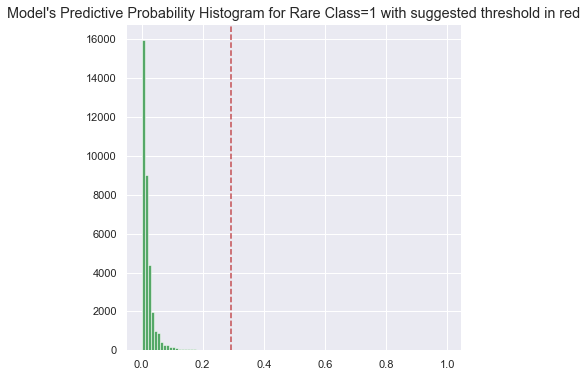

    Using threshold=0.5. However, 0.292 provides better F1=0.60 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 98.2%
Balanced Accuracy = 70.39% with Threshold = 0.50
Confusion Matrix:
[[34910    62]
 [  607   421]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34972
           1       0.87      0.41      0.56      1028

    accuracy                           0.98     36000
   macro avg       0.93      0.70      0.77     36000
weighted avg       0.98      0.98      0.98     36000

Balanced Accuracy = 74.17% with Threshold = 0.29
Confusion Matrix:
[[34835   137]
 [  527   501]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34972
           1       0.79      0.49      0.60      1028

    accuracy                           0.98     36000
   macro avg       0.89    

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 476
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    class_weights = [0.05147004 1.75063217]
    class_weighted_rows = {0: 174859, 1: 8999}
Training model now on resampled train data: (183858, 50). This will take time...
    Resampled data Training time taken = 38 seconds
##################  Completed Imbalanced Training using XGBClassifier ################
     Actual Training time taken

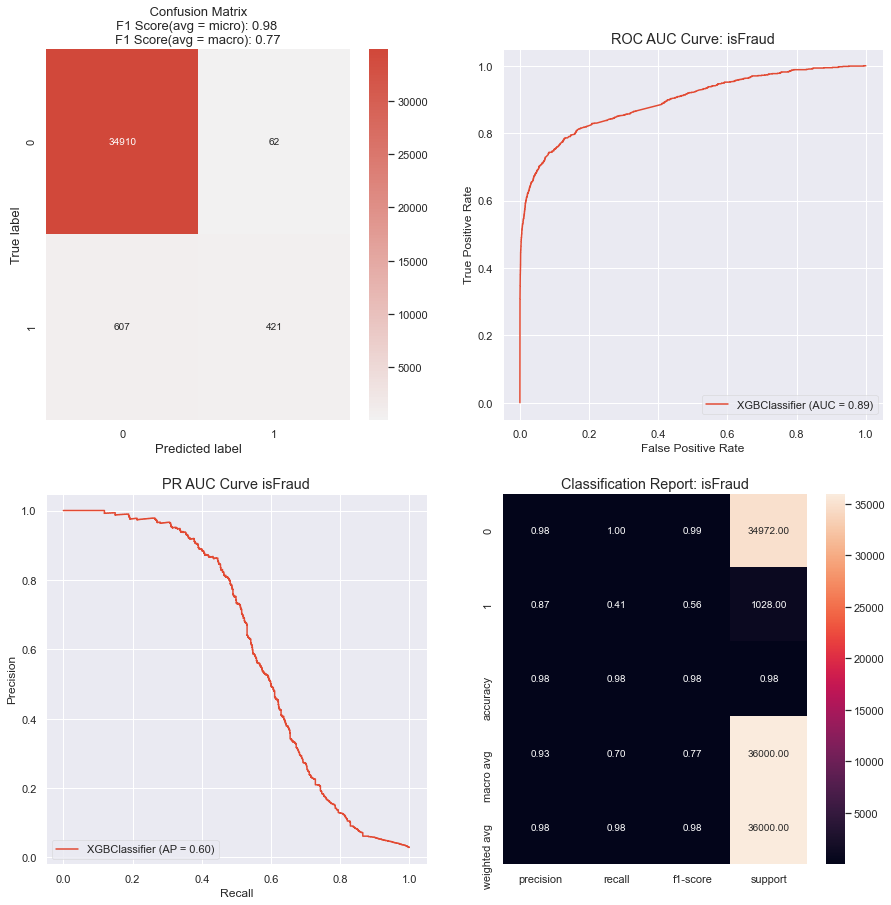

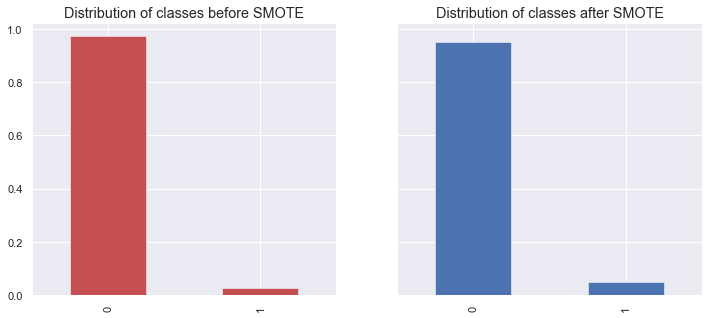

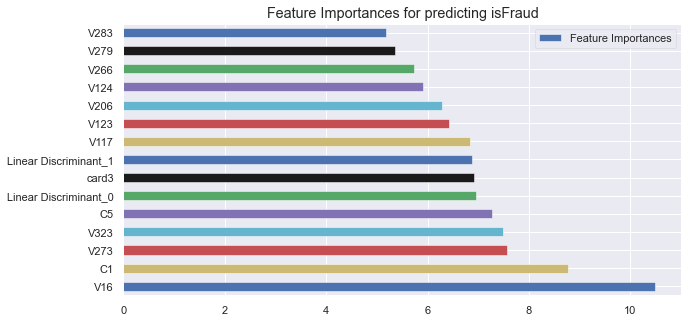

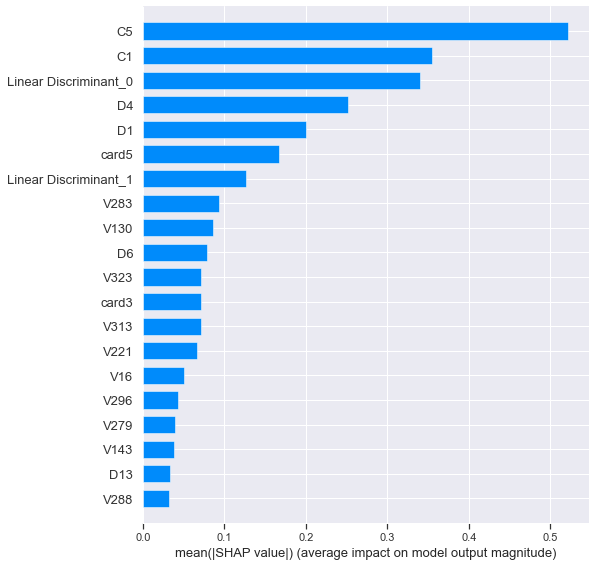

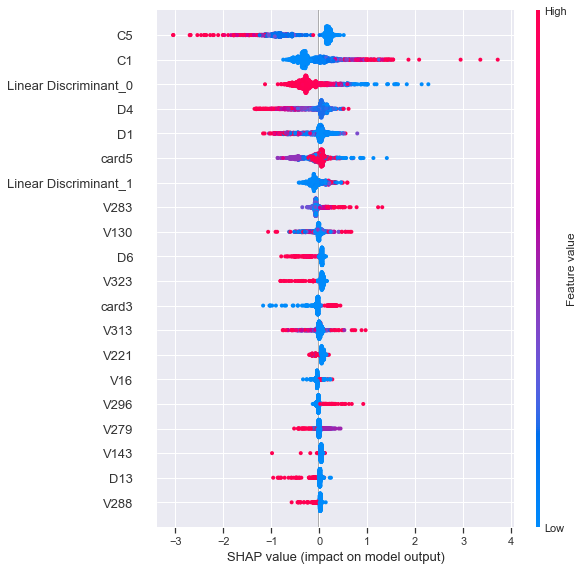

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 562
Writing Output files to disk...
    Saving predictions to .\isFraud\isFraud_Binary_Classification_test_modified.csv
    Saving predictions to .\isFraud\isFraud_Binary_Classification_submission.csv
    Saving predictions to .\isFraud\isFraud_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 9.7 for the Entire Process


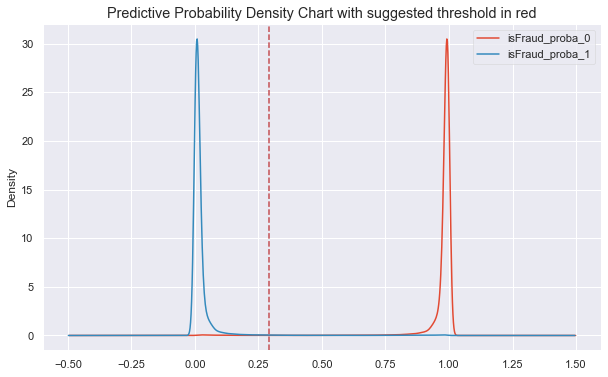

In [8]:
model, features, trainm, testm = Auto_ViML(
    train=train,
    target="isFraud",
    test=leaderboard,
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="roc-auc",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)